In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
# import pretty_midi
import mir_eval
import mir_eval.display
import logging
import pygame
from music21 import *
import music21
# import Ledger
# matplotlib%inline

In [ ]:
"""
    Pitch Notes
    # Use Spectrograms
    Use smaller models
    Start with Random Forests
    Infer differences based on how models are classified
    Depends on which type of Neural 
"""


In [2]:
# set up debug messages 
logging.debug('This is a debug message')
logging.info('This is an info message')
logging.warning('This is a warning message')
logging.error('This is an error message')
logging.critical('This is a critical message')

ERROR:root:This is an error message
CRITICAL:root:This is a critical message


In [3]:
piano_csv ='./maestro-v2.0.0.csv'

In [4]:
piano_df = pd.DataFrame.from_csv(piano_csv)

/Users/dsaphra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


(1282, 6)

In [6]:
df = piano_df.reset_index()
test_row = df.loc[df.duration == df.duration.min()]
test_path = test_row['midi_filename'].values[0]


In [7]:
def get_full_path(path: str):
    # Adds maestro-v2.0.0 to file path for accessing
    return './maestro-v2.0.0/' + path

def get_midi_from_path(path: str):
    full_path = get_full_path(path)
    pm = pretty_midi.PrettyMIDI(full_path)
    return pm

In [8]:
def get_music21_from_path(path: str):
    full_path = get_full_path(path)
    m21 = converter.parse(full_path)
    return m21

s = get_music21_from_path(test_path)

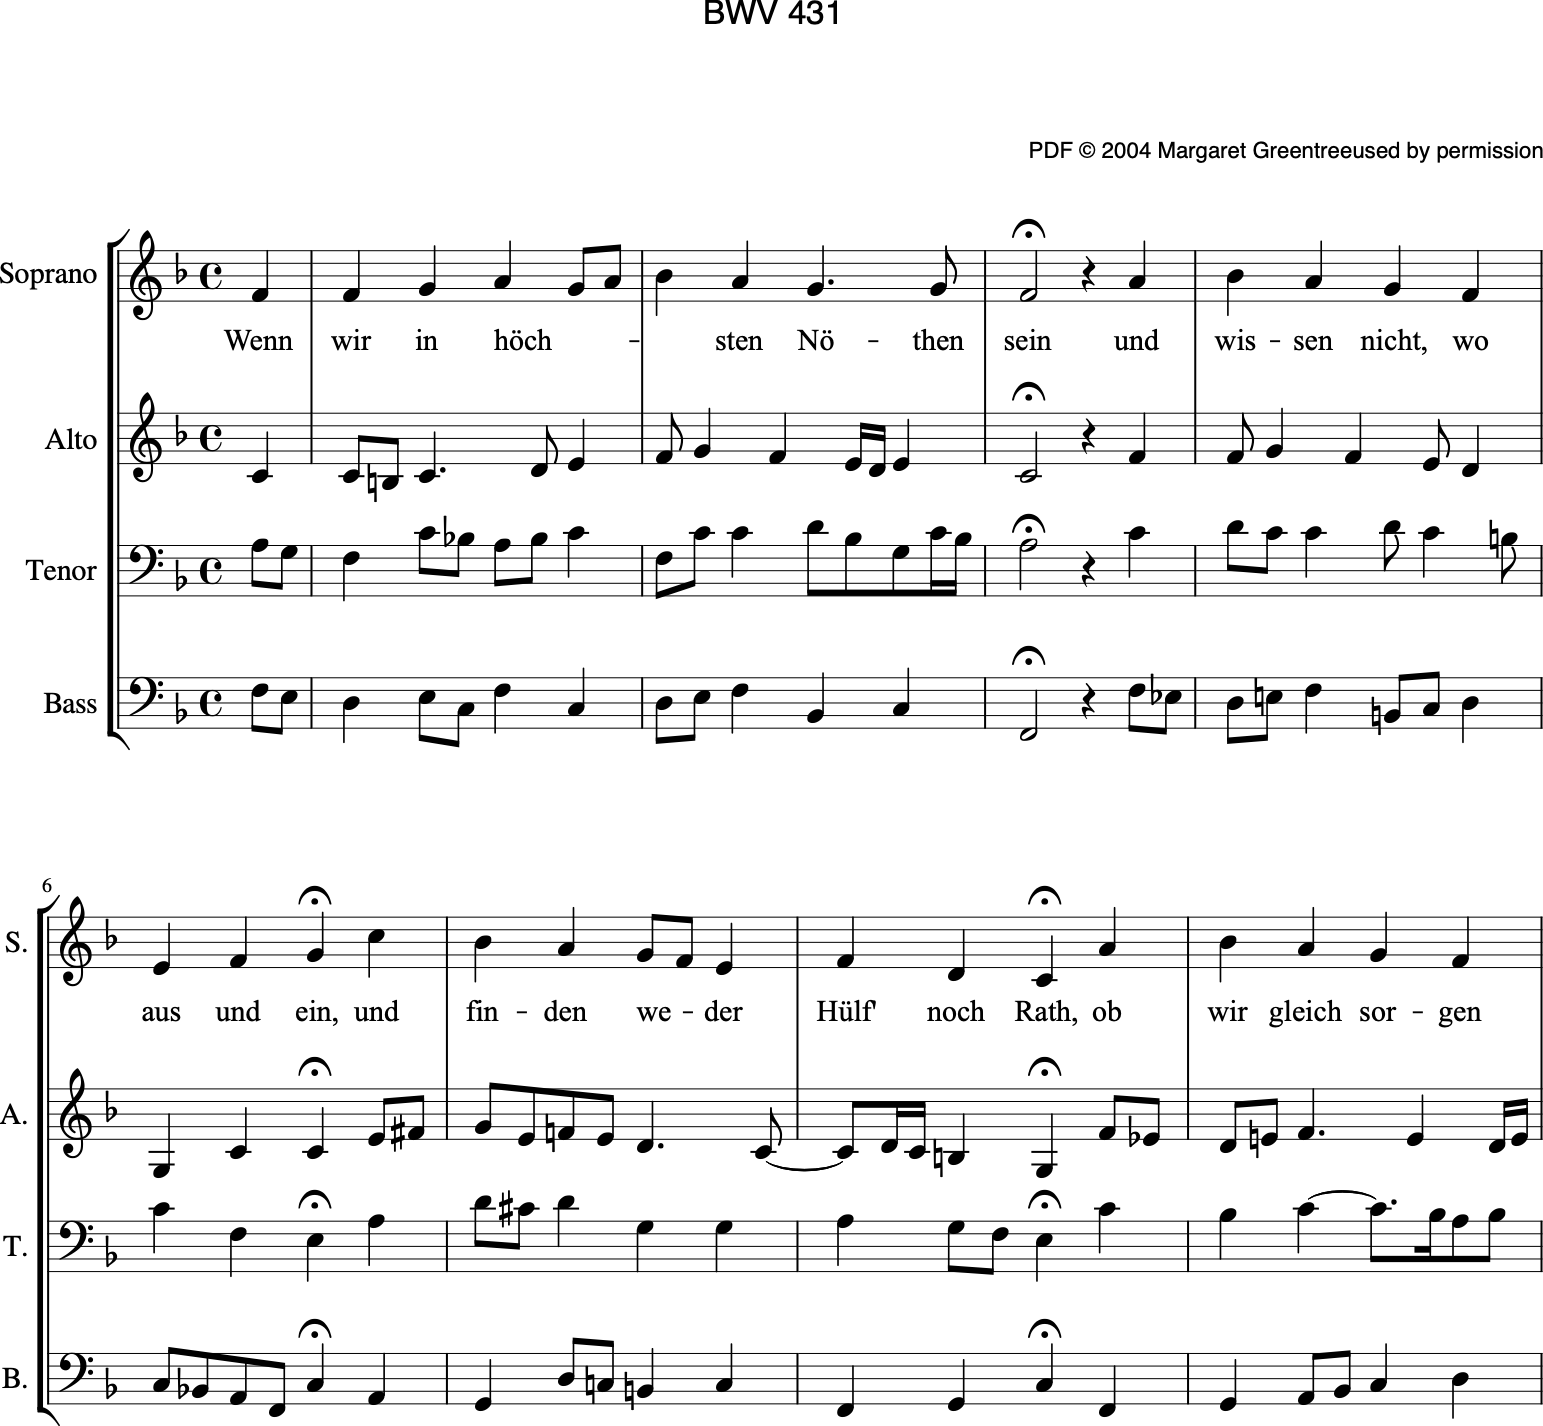

In [215]:
c = corpus.parse('bach/bwv' + str(info358['bwv']))
c.show()  # shows Bach BWV431

 
# for note in test_measure:
#     print(most_frequent(notes



In [ ]:
# parts = instrument.partitionByInstrument(c)
# if parts:
#     notes_top_parse = parts.parts[0].recurse()
# parts.elements

In [218]:
soprano_notes = []
part_class = type(c.elements[3])
print(part_class)

c_parts = []
c_elements = c.elements
for element in c_elements:
    if type(element) == part_class:
        c_parts.append(element)

<class 'music21.stream.Part'>


In [219]:
parts_dict = {}
for part in c_parts:
    instrument = part[0]
    instrument_name = instrument.partName
    parts_dict[instrument_name] = part[1:]
# c.elements[3].elements[2].elements

In [220]:
for key, value in parts_dict.items():
    measure_dict = {}
    measures = value.elements
    for measure in measures:
        measure_number = measure.measureNumber
        measure_dict[measure_number] = measure.elements
    parts_dict[key] = measure_dict
print(parts_dict['Soprano'])

{0: (<music21.layout.SystemLayout>, <music21.clef.TrebleClef>, <music21.key.Key of F major>, <music21.meter.TimeSignature 4/4>, <music21.note.Note F>), 1: (<music21.note.Note F>, <music21.note.Note G>, <music21.note.Note A>, <music21.note.Note G>, <music21.note.Note A>), 2: (<music21.note.Note B->, <music21.note.Note A>, <music21.note.Note G>, <music21.note.Note G>), 3: (<music21.note.Note F>, <music21.note.Rest rest>, <music21.note.Note A>), 4: (<music21.note.Note B->, <music21.note.Note A>, <music21.note.Note G>, <music21.note.Note F>), 5: (<music21.layout.SystemLayout>, <music21.note.Note E>, <music21.note.Note F>, <music21.note.Note G>, <music21.note.Note C>), 6: (<music21.note.Note B->, <music21.note.Note A>, <music21.note.Note G>, <music21.note.Note F>, <music21.note.Note E>), 7: (<music21.note.Note F>, <music21.note.Note D>, <music21.note.Note C>, <music21.note.Note A>), 8: (<music21.note.Note B->, <music21.note.Note A>, <music21.note.Note G>, <music21.note.Note F>), 9: (<music2

In [232]:
measure_notes = {}
note_class = parts_dict['Soprano'][3][0]
print(note_class)

for measure_number in range(5):
    measure_notes[measure_number] = []
    for part_name, part_info in parts_dict.items():
        measure_info = part_info[measure_number]
        for note in measure_info:
            if isinstance(note, music21.note.Note):
#             try:
                measure_notes[measure_number].append(note.name)
#             except:
#                 print('not a note')
print(measure_notes[3])            

<music21.note.Note F>
['F', 'A', 'C', 'F', 'A', 'C', 'F', 'F', 'E-']


In [ ]:
def is_note(note):
    return len(note)==1 or len(note) == 2

def remove_rests_from_measure(measure_notes):
    return [note for note in measure_notes if is_note(note)]

def remove_rests_from_measure_dict(measure_notes_dict):
    for meas_num, notes in measure_notes_dict.items():
        measure_notes_dict[meas_num] = remove_rests_from_measure(notes)
    return measure_notes_dict

measure_dict_notes = remove_rests_from_measure_dict(measure_notes)

In [ ]:
test_measure = measure_dict_notes[1]

from collections import Counter 

def get_only_note(most_common_tuples):
    most_common_notes = []
    for note in most_common_tuples:
        most_common_notes.append(note[0])
    return most_common_notes

def most_frequent(note_list): 
    occurence_count = Counter(note_list) 
    most_common_notes = occurence_count.most_common(3)
    return get_only_note(most_common_notes)
    
most_frequent(test_measure)

In [ ]:
measure_chord_dict = {}

for measure_num, notes in measure_dict_notes.items():
    top_3_notes = most_frequent(notes)
    measure_chord_dict[measure_num] = top_3_notes
print(measure_chord_dict)

meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 10 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>>, <music21.beam.Beams <music21.beam.Beam 1/continue>/<music21.beam.Beam 2/stop>>, <music21.beam.Beams <music21.beam.Beam 1/continue>/<music21.beam.Beam 2/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


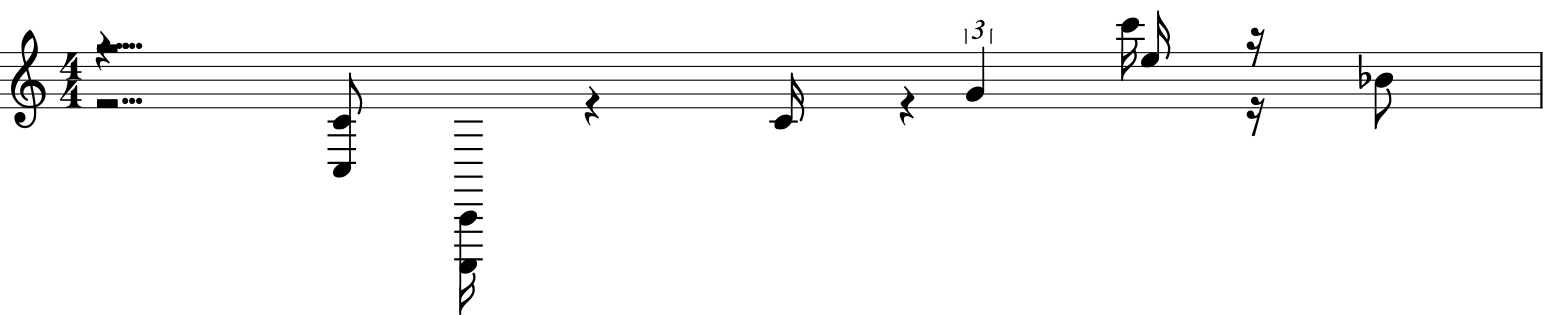

In [98]:
# for element in c.elements:
#     print(type(element))
excerpt = s.measure(1,collect=('Clef', 'TimeSignature', 'Instrument', 'KeySignature'))
excerpt.parts.show()

In [76]:
for this_note in c.elements[5].notes:
    print(this_note.octave)

In [10]:
parts = instrument.partitionByInstrument(s)
if parts:
    notes_top_parse = parts.parts[0].recurse()

In [11]:
notes_top_parse

<music21.stream.iterator.RecursiveIterator for Part:Piano @:0>

In [12]:
df['canonical_composer'].value_counts()
top_composers = df.groupby(df['canonical_composer']).size() > 30

In [29]:
def is_popular_composer(composer):
    mean = df['canonical_composer'].value_counts().mean()
    top_composers = df.groupby(df['canonical_composer']).size() > mean
    if top_composers[composer]:
        return 1
    else:
        return 0
    
def add_popular(s):
    s['popular'] = is_popular_composer(s['canonical_composer'])
    return s

In [30]:
df = df.apply(add_popular, axis=1)

df_pop = df.loc[df['popular'] == 1]

df_pop.shape

(1163, 8)

In [31]:
df.shape

(1282, 8)

In [32]:
df['canonical_composer'].value_counts().mean()

21.016393442622952

In [33]:
df_pop['canonical_composer'].unique()

array(['Alexander Scriabin', 'Claude Debussy', 'Domenico Scarlatti',
       'Felix Mendelssohn', 'Franz Liszt', 'Franz Schubert',
       'Frédéric Chopin', 'Johann Sebastian Bach', 'Johannes Brahms',
       'Joseph Haydn', 'Ludwig van Beethoven', 'Robert Schumann',
       'Sergei Rachmaninoff', 'Wolfgang Amadeus Mozart'], dtype=object)

In [47]:
bcl = corpus.chorales.ChoraleList()

In [49]:
info358 = bcl.byBudapest[358]

In [42]:
midi_df = pd.read_json('http://hog.ee.columbia.edu/craffel/lmd/md5_to_paths.json')

ValueError: arrays must all be same length

In [ ]:
midi_df.head()

In [17]:
# midi_data = get_midi_from_path(test_path)

# plt.hist(midi_data.get_pitch_class_histogram(), bins=30)

# print(midi_data.estimate_tempo())
# # Compute the relative amount of each semitone across the entire song, a proxy for key
# total_velocity = sum(sum(midi_data.get_chroma()))
# print([sum(semitone)/total_velocity for semitone in midi_data.get_chroma()])
# # Shift all notes up by 5 semitones
# for instrument in midi_data.instruments:
#     # Don't want to shift drum notes
#     if not instrument.is_drum:
#         for note in instrument.notes:
#             note.pitch += 5
# # Synthesize the resulting MIDI data using sine waves
# audio_data = midi_data.synthesize()

# fluidsynth_path = '/Users/dsaphra/Downloads/pyFluidSynth-1.2.5-py3-none-any.whl'

# piano_roll = midi_data.fluidsynth()


# def get_pyplay(path):
#     mixer = pygame.mixer.init()
#     full_path = get_full_path(path)
# #     file = file.load(full_path)
#     py_midi = mixer.music.load(full_path)
#     return py_midi

# get_pyplay(test_path)

In [39]:
df_pop['canonical_title'].unique()

array(['24 Preludes Op. 11, No. 13-24', '3 Etudes, Op. 65',
       '5 Preludes, Op.15', 'Entragete, Op.63',
       'Etude Op. 2 No.1;  Etudes Op. 8, Nos. 5, 11 and 12',
       'Etude Op. 42, Nos. 4 & 5', 'Etude Op. 8, No. 13',
       'Etude in D-flat Major, Op. 8 No. 10', 'Etudes from Op.8',
       'Fantasy Op. 28 in B Minor', 'Fantasy in B Minor, Op. 28',
       'Fantasy, Op. 28', 'Fragilite, Op.51',
       'Prelude and Nocturne for Left Hand, Op. 9', 'Sonata No. 2',
       'Sonata No. 2 in G-sharp Minor, Op. 19',
       'Sonata No. 2 in G-sharp Minor, Op. 19 (Complete)',
       'Sonata No. 3 in F-sharp Minor, Op. 23',
       'Sonata No. 4 in F-sharp Major ,Op.30',
       'Sonata No. 5 in F-sharp Minor, Op. 53', 'Sonata No. 5, Op. 53',
       'Sonata No. 9', 'Sonata No. 9, Op. 68',
       'Sonata No. 9, Op. 68, "Black Mass"',
       'Two Impromptus, Op. 14 (Complete)', 'Waltz, Op. 38',
       '"Feux d\'artifice" from Book II', '"Images", Series I',
       '"Les collines d\'Anacapri" f

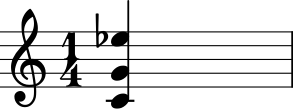

In [18]:
cMinor = chord.Chord(['C4', 'G4', 'E-5'])
cMinor.show()

In [225]:
info358

{'title': 'Wenn wir in höchsten Nöten sein',
 'bwv': 431,
 'kalmus': 358,
 'baerenreiter': 68,
 'budapest': 358,
 'riemenschneider': 68,
 'notes': None}